# Исследовательский анализ рынка Москвы

- Автор: Хазанов Михаил
- Дата: 14.02.2025

### Цели и задачи проекта

<font color='#777778'>В этом блоке перечислите цель проекта и те задачи, которые вы решаете. Можно использовать описания проекта, но будет полезно, если вы сформулируете основную цель проекта самостоятельно.

**Цель:** Необходимо провести исследовательский анализ рынка Москвы. Эти результаты помогут в выборе подходящего инвесторам места для открытия заведения общественного питания в Москве.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу. </font>

### Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.

* Загрузка данных и знакомство с ними.
* Предобработка данных.
* Исследовательский анализ данных.
* Итоговые выводы.

</font>

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Пустые ячейки после каждого задания — примерное пространство для работы.
# Вы можете свободно добавлять или удалять ячейки по своему усмотрению в зависимости от логики и объёма работы.

In [2]:
# Используйте ячейки типа Code для вашего кода

In [3]:
# При необходимости добавьте новые ячейки для кода или удалите пустые

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
# Импортируем библиотеки
import pandas as pd


# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции
!pip install phik

In [5]:
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix
!pip install phik

In [6]:
# Выгружаем данные в переменные bank_df и clients_df
rest_info_df = pd.read_csv('...')
rest_price_df = pd.read_csv('...')

In [7]:
# Выводим первые строки датафрейма на экран
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [8]:
# Выводим информацию о датафрейме
# Выводим первые строки датафрейма на экран
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [9]:
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [10]:
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

In [11]:
# Считаем долю пропусков
rest_info_df.isna().sum() / rest_info_df.shape[0]

id          0.000000
name        0.000000
category    0.000000
address     0.000000
district    0.000000
hours       0.063764
rating      0.000000
chain       0.000000
seats       0.429574
dtype: float64

In [12]:
rest_price_df.isna().sum() / rest_price_df.shape[0]

id                   0.000000
price                0.183095
avg_bill             0.059635
middle_avg_bill      0.224002
middle_coffee_cup    0.868162
dtype: float64

В файле информации о заведениях общественного питания содержится 8406 строк. Основная масса пропусков содержится в seats - количестве посадочных мест (43% пропусков).                                                                                                                                          
В seats планирую заменить с float64 На int64, так как количество мест не должно быть дробным. В поле hours (часы работы) порядка 6% пропусков. Типы данных: дробные числа - 2, целые числа - 1, объект - 6.

В файле о ценах в 18% строк нет информации о категории цен (price), 6% - о среднем чеке (avg_bill). В 22% нет информации о среднем среднего чека (middle_avg_bill), в 87% - о средней стоимости чашки кофе (middle_coffee_cup). Типы данных: дробные числа - 2, объект - 3.


### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [13]:
# Объединяем датасеты в один методом merge
newdf = rest_info_df.merge(rest_price_df, on='id', how='left')
newdf.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Выбрал Left Join для присоединения, чтобы у "левой" таблицы вошли все строки.

In [14]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [15]:
newdf.isna().sum() / newdf.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [16]:
# Проверим факт "змеиного вида" в названии столбцов
column_all = newdf.columns.tolist()
column_all

['id',
 'name',
 'category',
 'address',
 'district',
 'hours',
 'rating',
 'chain',
 'seats',
 'price',
 'avg_bill',
 'middle_avg_bill',
 'middle_coffee_cup']

In [17]:
# Заменяем тип данных в столбце 'seats' на int64, оставляя пропуски
newdf['seats'] = newdf['seats'].astype('Int64')  # Используем 'Int64' для возможности сохранения NA
newdf


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN


- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [18]:
# Выводим уникальные значения в столбце 'category'
unique_categories = newdf['category'].unique()
display(unique_categories)


array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [19]:
unique_hours = newdf['hours'].unique()
print("Уникальные значения в столбце 'hours':")
print(unique_hours)

Уникальные значения в столбце 'hours':
['ежедневно, 10:00–22:00'
 'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00'
 'ежедневно, 09:00–22:00' ... 'пн-пт 08:30–21:30; сб,вс 09:00–21:30'
 'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00'
 'пн-сб 10:30–21:30']


In [20]:
unique_price = newdf['price'].unique()
print("Уникальные значения в столбце 'price':")
print(unique_price)

Уникальные значения в столбце 'price':
[nan 'выше среднего' 'средние' 'высокие' 'низкие']


In [21]:
# Считаем количество различных категорий
category_counts = newdf['category'].value_counts()
display(category_counts)

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [22]:
# Фильтруем строки, где avg_bill является NaN (пропуск)
missing_avg_bill = newdf[newdf['avg_bill'].isnull()]

# Выводим строки с пропусками в avg_bill
missing_avg_bill.head(50)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,<NA>,средние,NaN,NaN,NaN
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,<NA>,NaN,NaN,NaN,NaN
13,aea18265b0a0415893f1e796b82568fe,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,1,180,NaN,NaN,NaN,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,<NA>,NaN,NaN,NaN,NaN
20,1ab5691e4da844d3abadf085e0957852,Чебуреки Манты,кафе,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",4.3,1,148,NaN,NaN,NaN,NaN
21,3483fb839c134fc89e15a1da83053498,7/12,кафе,"Москва, Прибрежный проезд, 7",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,<NA>,NaN,NaN,NaN,NaN
22,66274ec5b26440e389aa3584b5cc2e9c,Крымские чебуреки,кафе,"Москва, Коровинское шоссе, 35, стр. 17",Северный административный округ,пн-пт 09:00–21:00,4.2,0,<NA>,NaN,NaN,NaN,NaN
23,78709462f2b3480f825489a5321a3563,Буханка,булочная,"Москва, Лобненская улица, 13к2",Северный административный округ,"ежедневно, 08:00–22:00",4.7,1,<NA>,NaN,NaN,NaN,NaN
24,0f5d22f5377340d0a81a9328e6ebdcac,Drive Café,кафе,"Москва, улица Дыбенко, 9Ас1",Северный административный округ,"ежедневно, круглосуточно",4.0,1,<NA>,NaN,NaN,NaN,NaN


В обобщенном датафрейме после объединения файлов в информации о заведениях общественного питания содержится 8406 строк. Основная масса пропусков содержится в seats - количестве посадочных мест (43% пропусков). В поле hours (часы работы) порядка 6% пропусков.

В файле о ценах в 18% строк нет информации о категории цен (price), 6% - о среднем чеке (avg_bill). В 22% нет информации о среднем среднего чека (middle_avg_bill), в 87% - о средней стоимости чашки кофе (middle_coffee_cup).

Количество посадочных мест я бы оставил с пропусками, потому что усреднять или обнулять 43% пропусков неправильно. Очевидно, что где-то может быть и 30 мест, а где-то и 500. Не заполнили их, вероятно, из-за отсутствия данной информации в общем доступе. Часы работы с пропусками я бы пока оставил, хотя не заполнено всего 6% полей. Вероятно, это относится к не самым популярным заведениям, где просто не указали в открытых источниках информацию. Оставил бы информацию о среднем чеке avg_bill, почти 61% пропусков, вероятно это не самая популярная информация для непопулярных мест. И отсутствие данных в этом поле свидетельствует, соответственно, о пропусках в middle_avg_bill и middle_coffee_cup. middle_avg_bill (63% пропусков) и middle_coffee_cup (94% пропусков) - пропуски оставлю, так как их слишком большое количество, ставить нули или среднее или медиану неправильно.

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [23]:
# Уникальные значения в категориальных данных
unique_names = newdf['name'].unique()
unique_addresses = newdf['address'].unique()


display(unique_names)
display(unique_addresses)

array(['WoWфли', 'Четыре комнаты', 'Хазри', ..., 'Миславнес', 'Самовар',
       'Kebab Time'], dtype=object)

array(['Москва, улица Дыбенко, 7/1', 'Москва, улица Дыбенко, 36, корп. 1',
       'Москва, Клязьминская улица, 15', ...,
       'Москва, улица Лобачевского, 52, корп. 1',
       'Москва, Болотниковская улица, 52, корп. 2',
       'Москва, Чонгарский бульвар, 26А, корп. 1'], dtype=object)

In [24]:
# Меняем регистр 
newdf['name'] = newdf['name'].str.lower()
newdf['address'] = newdf['address'].str.lower()
newdf

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN


In [25]:
# Проверяем полные дубликаты в датафрейме
newdf.duplicated().sum()

0

In [26]:
# Определяем неявные дубликаты в DataFrame
duplicates = newdf.duplicated(subset=['name', 'address'], keep=False)

# Считаем количество дубликатов
num_duplicates = duplicates.sum()

# Выводим количество дубликатов
display(num_duplicates)

8

In [27]:

# Отображаем дубликаты
display(num_duplicates)

8

Всего было найдено 8 дубликатов, удаляем их из датафрейма

In [28]:
# Удаляем дубликаты
newdf = newdf.drop_duplicates(subset=['name', 'address'], keep=False)
newdf

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN


- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [29]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def create_24_7(x):
    
    if (x) == 'ежедневно, круглосуточно':
        return True
    return False

# Создаем столбец is_24_7 с помощью функции create_24_7
newdf['is_24_7'] = newdf['hours'].apply(create_24_7)

# Отображаем обновленный DataFrame
display(newdf)

/tmp/ipykernel_251/2097268299.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['is_24_7'] = newdf['hours'].apply(create_24_7)


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN,True


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

Первоначально были выгружены два датафрейма, изучены их данные по столбцам, типу данных, наличию пропусков. После два датафрейма объединили в один, все пропуски оставили на месте. Не заполняли нулем, медианой или средним, так как это сильно исказило бы данные. Было выявлено 8 неявных дубликатов, они удалены. Исследованы уникальные значения в столбцах name, category, district, price. Добавлен новый столбец is_24_7, показывающий факт наличия круглосуточных объектов.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [30]:
# Выводим уникальные значения в столбце 'category'
unique_categories = newdf['category'].unique()
display(unique_categories)


array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [31]:
# Считаем количество объектов по каждой категории
category_counts = newdf['category'].value_counts()
display(category_counts)

кафе               2375
ресторан           2040
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            255
Name: category, dtype: int64

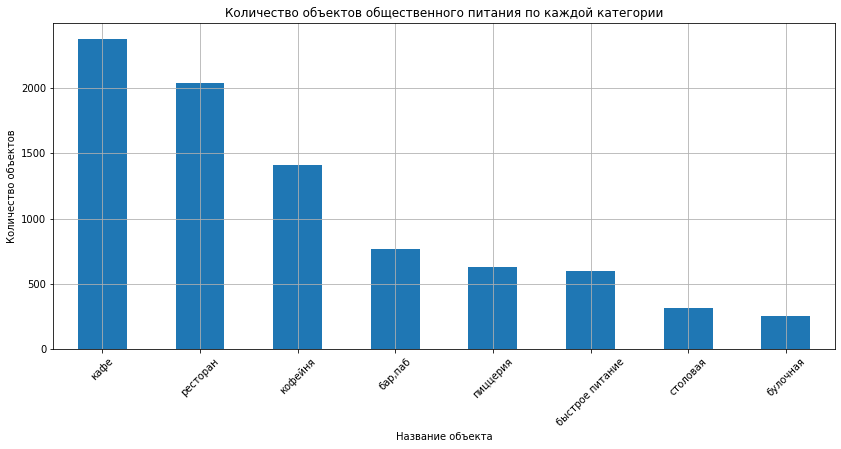

In [32]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
newdf['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество объектов общественного питания по каждой категории'
)

# Настраиваем оформление графика
plt.xlabel('Название объекта')
plt.ylabel('Количество объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Как видно из диаграммы, самое большое количество заведений - это "кафе" (2375 шт), ресторан (2040 шт) и "кофейня" (1413 шт). Остальных категорий существенно меньше. Самые низкие значения - это "столовая" (315 шт) и "булочная" (255 шт).

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [33]:
# Считаем количество объектов по каждой категории
category_counts = newdf['district'].value_counts()
display(category_counts)

Центральный административный округ         2242
Северный административный округ             896
Южный административный округ                892
Северо-Восточный административный округ     889
Западный административный округ             849
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

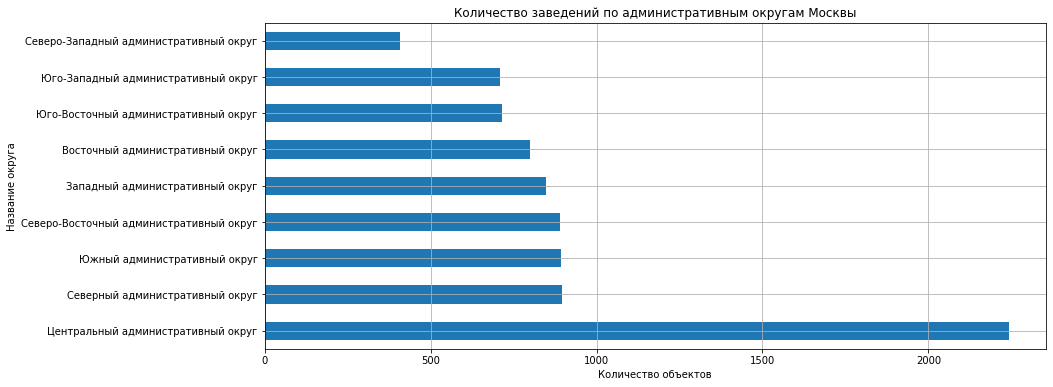

In [34]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
newdf['district'].value_counts().plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений по административным округам Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Количество объектов') 
plt.ylabel('Название округа')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Самое большое количество заведений находится в Центральном округе. Это связано с тем, что многие посетители работают в центре, а в выходные дни центр "притягивает" клиентов, которые много времени проводят в популярных местах с известными достопримечательностями. В остальных округах наблюдается определенный баланс (700-900 заведений), это примерно в 2.5-3 раза меньше, чем в центре. Выделяется Северо-Западный округ с 409 заведениями, это в 2 раза меньше остальных "спальных" округов. Как вариант, это связано с тем, что по площади и по населению это самый маленький округ Москвы (информация из Яндекс).

In [35]:
# Фильтр для Центрального административного округа
center_moscow = newdf[newdf['district'] == 'Центральный административный округ']

# Подсчет количества заведений по категориям
category_distribution = center_moscow['category'].value_counts()

display(category_distribution)

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

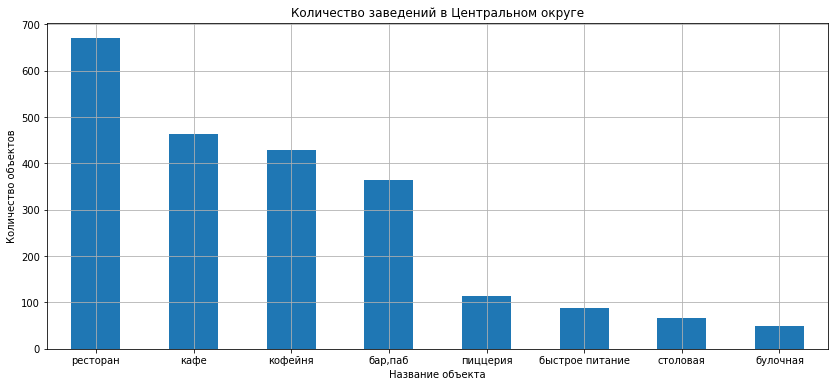

In [36]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
center_moscow['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в Центральном округе'
)

# Настраиваем оформление графика
plt.xlabel('Название объекта')
plt.ylabel('Количество объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Если смотреть по ЦАО (Центральный административный округ), то здесь преобладает категория "ресторан" (670 шт). Очевидно, это более дорогая категория по сравнению с "кафе" (464 шт), в центре города обычно больше дорогих заведений, которые имеют высокую выручку. В пункте 3.1 в целом по городу идет преобладание категории "кафе". Категории "кофейня" (428 шт) и "бар, паб" (364 шт) не сильно отстают от "кафе". Остальные типы заведений существенно отстают (50-113 шт).

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [37]:
# Проверяем распределение данных по значениям в столбце
for column in ['chain']:
    display(newdf[column].value_counts(normalize=True))
    display()

0    0.618719
1    0.381281
Name: chain, dtype: float64

In [38]:
# Подсчет общего количества сетевых и несетевых заведений
chain_count = newdf['chain'].value_counts()
display(chain_count)

0    5196
1    3202
Name: chain, dtype: int64

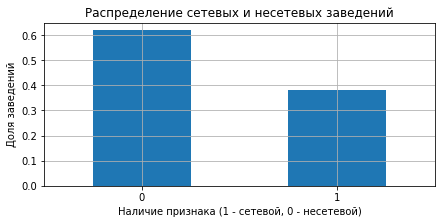

In [39]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
newdf['chain'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение сетевых и несетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Наличие признака (1 - сетевой, 0 - несетевой)')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

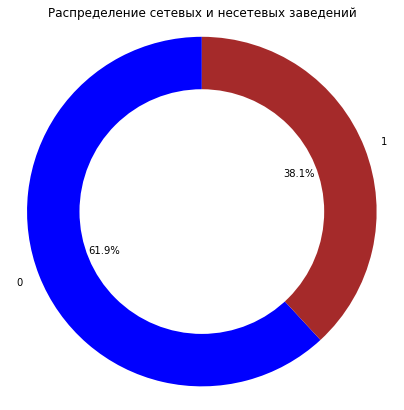

In [40]:
# распределение данных
center = newdf['chain'].value_counts(normalize=True)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 7))

# Строим круговую диаграмму
plt.pie(
    center,
    labels=center.index,
    autopct='%1.1f%%',  # Процентные значения
    startangle=90,  # Начальный угол
    colors=['blue', 'brown'],  # Цвета для каждого сектора
)

# Устанавливаем круг в центре
centre_circle = plt.Circle((0, 0), 0.70, fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Настраиваем оформление графика
plt.axis('equal')  # Уравниваем оси для снятия искажения
plt.title('Распределение сетевых и несетевых заведений')

# Выводим график
plt.show()

По общему количеству заведений 38.1% относится к сетевым, при этом 61.9% - к несетевым.

In [41]:
# Подсчет количества заведений по категориям
category_chain_count = newdf.groupby(['category', 'chain']).size().unstack(fill_value=0)

# Получаем колонку с несетевыми заведениями
non_chain_count = category_chain_count[0]  # Предполагаем, что 0 — это несетевые заведения

# Сортируем по убыванию несетевых заведений
sorted_category_chain_count = category_chain_count.sort_values(by=0, ascending=False)

# Вывод количества заведений в разрезе категорий
display(sorted_category_chain_count)

chain,0,1
category,,
кафе,1596,779
ресторан,1311,729
кофейня,693,720
"бар,паб",596,168
быстрое питание,371,232
пиццерия,303,330
столовая,227,88
булочная,99,156


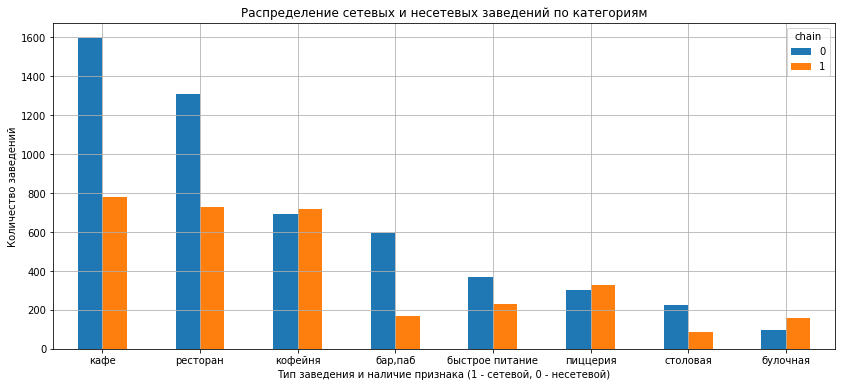

In [42]:
# Сортируем по количеству несетевых заведений (0)
grouped = sorted_category_chain_count.sort_values(by=0, ascending=False)

# Построим график столбчатой диаграммы
grouped.plot(kind='bar',
               title='Распределение сетевых и несетевых заведений по категориям',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Тип заведения и наличие признака (1 - сетевой, 0 - несетевой)',
               rot=0,
               figsize=(14, 6))

# Добавление сетки
plt.grid()

# Выводим график
plt.show()

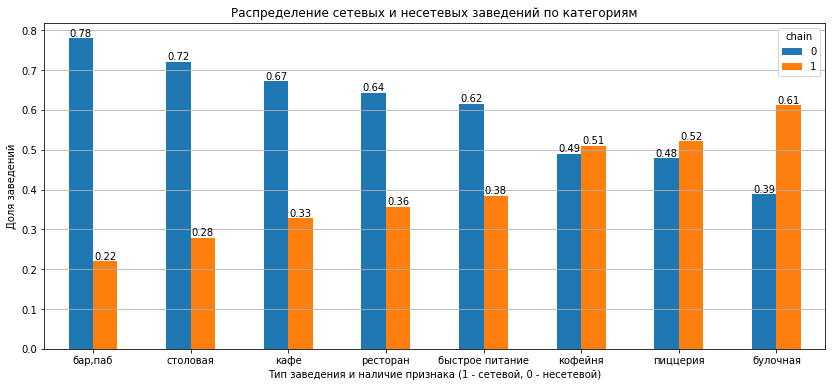

In [43]:
# Подсчет количества заведений по категориям
grouped = newdf.groupby('category')['chain'].value_counts().unstack(fill_value=0)

# Рассчитываем долю для сетевых и несетевых заведений
percentage_grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Сортируем по убыванию несетевые заведения
sorted_percentage_grouped = percentage_grouped.sort_values(by=0, ascending=False)

# Построим график столбчатой диаграммы в процентах
sorted_percentage_grouped.plot(kind='bar',
                         title='Распределение сетевых и несетевых заведений по категориям',
                         legend=True,
                         ylabel='Доля заведений',
                         xlabel='Тип заведения и наличие признака (1 - сетевой, 0 - несетевой)',
                         rot=0,
                         figsize=(14, 6))

# Добавляем сетку
plt.grid(axis='y')

# Настраиваем отображение процентов на графике
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

# Выводим график
plt.show()


По категории "кафе" преобладают несетевые заведения, их примерно в 2 раза больше (1596 против 779), в категории "ресторан" аналогичный тренд в 1.7 раза (1311 против 729), в категории "бар, паб" доля несетевых в 3.5 раза выше (596 против 168). В кофейнях и пиццериях наблюдается примерное равенство.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [44]:
# Изучаем статистические показатели столбца seats
display(newdf['seats'].describe())

count    4789.000000
mean      108.301107
std       122.848843
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

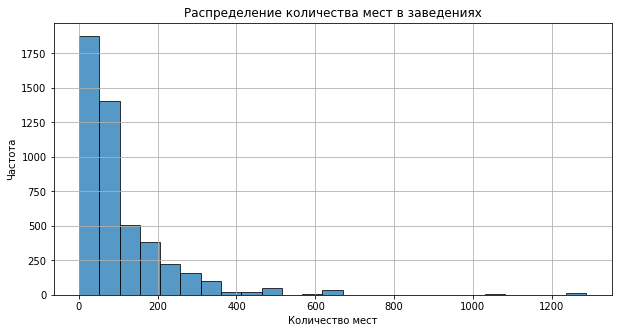

In [45]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму с помощью pandas через plot(kind='hist')
newdf['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение количества мест в заведениях')
plt.xlabel('Количество мест')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

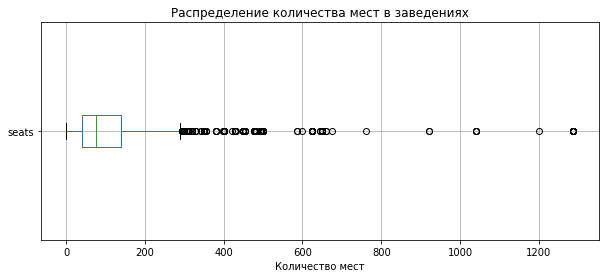

In [46]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце seats
newdf.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества мест в заведениях')
plt.xlabel('Количество мест')

# Выводим график
plt.show()

Если смотреть общую динамику по посадочным местам в заведениях, то данные имеют широкий разброс. Медиана - 75 мест, среднее значение - 108, при этом стандартное отклонение - 122,8. Q1 (25% значений) = 40, Q3 (75% значений) = 140, данные за пределами правой границы составляют 140 + ((140-40) * 1,5) = 290 мест. Данные правее этого значения являются выбросами.

In [47]:
category_seats_stats = newdf.groupby('category')['seats'].describe()

# Преобразуем результат в DataFrame
category_seats_stats_df = category_seats_stats.reset_index()

# Переименуем колонки, чтобы упростить доступ к ним
category_seats_stats_df.columns = ['category', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Сортируем по медиане
sorted_category_seats_stats = category_seats_stats_df.sort_values(by='50%', ascending=False)

# Отображаем результаты
display(sorted_category_seats_stats)

,category,count,mean,std,min,25%,50%,75%,max
6,ресторан,1267.0,121.817680,123.873486,0.0,48.0,86.0,150.0,1288.0
0,"бар,паб",467.0,124.477516,145.162278,0.0,48.0,82.0,148.5,1288.0
4,кофейня,751.0,111.199734,127.837772,0.0,40.0,80.0,144.0,1288.0
7,столовая,164.0,99.750000,122.951453,0.0,40.0,75.5,117.0,1200.0
2,быстрое питание,349.0,98.891117,106.611739,0.0,28.0,65.0,140.0,1040.0
3,кафе,1217.0,97.365653,117.922464,0.0,35.0,60.0,120.0,1288.0
5,пиццерия,427.0,94.496487,112.282703,0.0,30.0,55.0,120.0,1288.0
1,булочная,147.0,88.115646,96.787050,0.0,25.0,50.0,120.0,625.0


/tmp/ipykernel_251/907101569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['category'] = pd.Categorical(newdf['category'], categories=sorted_categories, ordered=True)


<Figure size 1008x432 with 0 Axes>

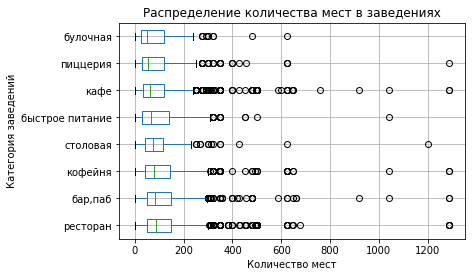

In [48]:
# Получаем отсортированный список категорий
sorted_categories = sorted_category_seats_stats['category'].tolist()

# Создаем новую колонку 'category' в newdf с указанием порядка
newdf['category'] = pd.Categorical(newdf['category'], categories=sorted_categories, ordered=True)

# Строим диаграмму размаха значений в столбце 'seats' с группировкой по 'category'
plt.figure(figsize=(14, 6))
newdf.boxplot(column='seats', by='category', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества мест в заведениях')
plt.suptitle('')  # Удаляем заголовок по умолчанию
plt.xlabel('Количество мест')
plt.ylabel('Категория заведений')

# Выводим график
plt.show()


Укажем основные моменты в крупных категориях: ресторан, кафе, кофейня.

В ресторане среднее значение 121,8, медиана 86, стандартное отклонение 123,9. Q1 (25% значений) = 48, Q3 (75% значений) = 150, данные за пределами правой границы составляют 150 + ((150-48) * 1,5) = 303 мест. Данные правее этого значения являются выбросами.

В кафе среднее значение 97,4, медиана 60, стандартное отклонение 117,9. Q1 (25% значений) = 35, Q3 (75% значений) = 120, данные за пределами правой границы составляют 120 + ((120-35) * 1,5) = 247 мест. Данные правее этого значения являются выбросами.

В кофейне среднее значение 111,2, медиана 80, стандартное отклонение 127,8. Q1 (25% значений) = 40, Q3 (75% значений) = 144, данные за пределами правой границы составляют 144 + ((144-40) * 1,5) = 300 мест. Данные правее этого значения являются выбросами.

In [49]:
# Фильтрация заведений с количеством мест больше 500
large_seating = newdf[newdf['seats'] > 500]

# Сортировка по убыванию количества мест
large_seating_sorted = large_seating.sort_values(by='seats', ascending=False)

# Вывод отфильтрованных и отсортированных данных
display(large_seating_sorted)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
6641,0508ba663a4c42d1b5068e51afcc26ef,one price coffee,кофейня,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,"ежедневно, 08:30–20:00",4.3,1,1288,NaN,NaN,NaN,NaN,False
6838,0b8062d352c84a65bca70622eecbc745,alternative coffee,кофейня,"москва, проспект вернадского, 41, стр. 1",Западный административный округ,"пн-пт 09:00–21:00; сб,вс 09:00–22:00",4.3,0,1288,NaN,NaN,NaN,NaN,False
6808,a555f30eac234e6ca28480afa418ed3c,яндекс лавка,ресторан,"москва, проспект вернадского, 51, стр. 1",Западный административный округ,"ежедневно, круглосуточно",4.0,1,1288,NaN,NaN,NaN,NaN,True
6807,ba5a32dfee6c4661a25c0ea2d39f393d,loft-cafe академия,кафе,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,пн-пт 09:00–20:00; сб 09:00–16:00,3.6,0,1288,NaN,NaN,NaN,NaN,False
6771,6f85ea6419c941208f7deee9194383e1,точка,кафе,"москва, проспект вернадского, 84, стр. 1",Западный административный округ,NaN,4.7,1,1288,NaN,NaN,NaN,NaN,False
6690,f9e4ec2d1e5946cf83c9564b2d06acd6,японская кухня,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,NaN,4.4,1,1288,NaN,NaN,NaN,NaN,False
6684,6287fb9811434558a4ada0ae08be9c04,пивной ресторан,"бар,паб","москва, проспект вернадского, 121, корп. 1",Западный административный округ,NaN,4.5,0,1288,NaN,NaN,NaN,NaN,False
6658,19a223ff04f74af7a12bd87b77ce468b,гудбар,"бар,паб","москва, проспект вернадского, 97, корп. 1",Западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,0,1288,средние,Средний счёт:700 ₽,700.0,NaN,False
6574,5925d9677fe24778a27e35ccd88c0a2d,мюнгер,пиццерия,"москва, проспект вернадского, 97, корп. 1",Западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288,NaN,NaN,NaN,NaN,False
6524,c93d20f53072495c9cf2e489914cb8a5,ян примус,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,1,1288,выше среднего,Средний счёт:1500 ₽,1500.0,NaN,False


Дополнительно вывел 56 значений с количеством мест более 500. Возможно, данные были внесены по ошибке. В части заведений присутствуют похожие адреса (соседние дома). Возможно, при внесении данных указали совокупность мест из нескольких заведений.

Также приведем данные без выбросов.

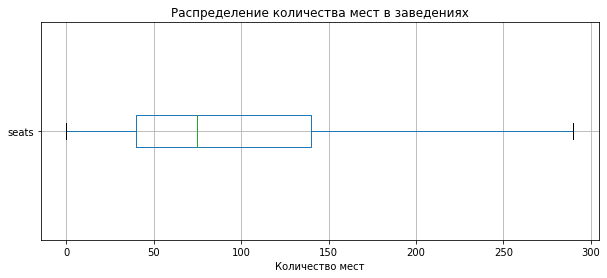

In [50]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце seats
newdf.boxplot(column='seats', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества мест в заведениях')
plt.xlabel('Количество мест')

# Выводим график
plt.show()

/tmp/ipykernel_251/3328393682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['category'] = pd.Categorical(newdf['category'], categories=sorted_categories, ordered=True)


<Figure size 1008x432 with 0 Axes>

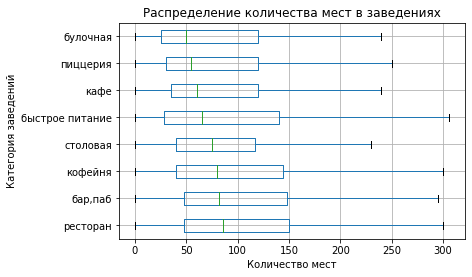

In [51]:
# Получаем отсортированный список категорий
sorted_categories = sorted_category_seats_stats['category'].tolist()

# Создаем новую колонку 'category' в newdf с указанием порядка
newdf['category'] = pd.Categorical(newdf['category'], categories=sorted_categories, ordered=True)

# Строим диаграмму размаха значений в столбце 'seats' с группировкой по 'category'
plt.figure(figsize=(14, 6))
newdf.boxplot(column='seats', by='category', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества мест в заведениях')
plt.suptitle('')  # Удаляем заголовок по умолчанию
plt.xlabel('Количество мест')
plt.ylabel('Категория заведений')

# Выводим график
plt.show()


---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [52]:
# Изучаем статистические показатели столбца rating
display(newdf['rating'].describe())

count    8398.000000
mean        4.230138
std         0.470292
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Медиана по рейтингу составляет 4.3, среднее значение 4.23, стандартное отклонение 0.47. В целом это говорит о равномерном распределении рейтинга.

In [53]:
# Изучаем статистические показатели столбца rating по категориям
category_rating_stats = newdf.groupby('category')['rating'].describe()

# Добавляем столбец с медианой
category_rating_stats['median'] = category_rating_stats['50%']

# Сортируем по медиане
sorted_category_rating_stats = category_rating_stats.sort_values(by='median', ascending=False)

# Отображаем результаты
display(sorted_category_rating_stats)

,count,mean,std,min,25%,50%,75%,max,median
category,,,,,,,,,
"бар,паб",764.0,4.387696,0.380392,1.1,4.3,4.4,4.6,5.0,4.4
ресторан,2040.0,4.290392,0.413333,1.0,4.2,4.3,4.5,5.0,4.3
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0,4.3
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0,4.3
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0,4.3
булочная,255.0,4.269020,0.386918,1.3,4.2,4.3,4.4,5.0,4.3
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0,4.2
кафе,2375.0,4.124674,0.565802,1.0,4.0,4.2,4.4,5.0,4.2


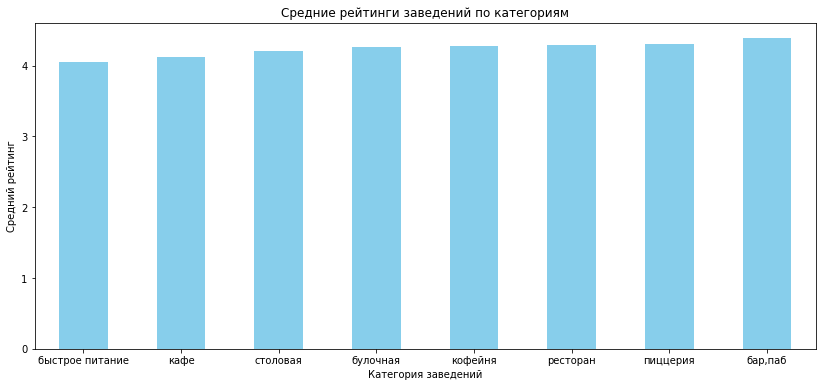

In [54]:
# 1. Подсчитываем средний рейтинг по категориям
mean_ratings = newdf.groupby('category')['rating'].mean().sort_values()

# 2. Визуализируем средние рейтинги по категориям с помощью столбчатой диаграммы
plt.figure(figsize=(14, 6))
mean_ratings.plot(kind='bar', color='skyblue')

# Добавляем заголовок и метки осей
plt.title('Средние рейтинги заведений по категориям')
plt.xlabel('Категория заведений')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=0)

# Выводим график
plt.show()

По категориям также видно, что средний рейтинг составляет 4.2-4.4 из 5 баллов, что говорит о высоком уровне обслуживания заведений в Москве

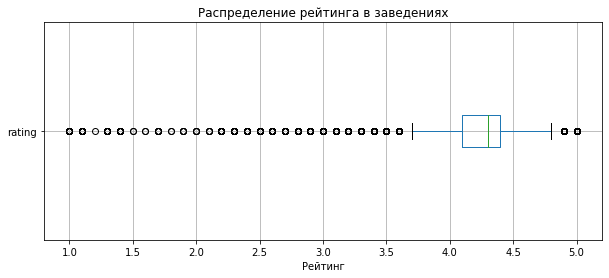

In [55]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце balance
newdf.boxplot(column='rating', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение рейтинга в заведениях')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

In [56]:
category_rating_stats = newdf.groupby('category')['rating'].describe()

# Преобразуем результат в DataFrame
category_rating_stats_df = category_rating_stats.reset_index()

# Переименуем колонки, чтобы упростить доступ к ним
category_rating_stats_df.columns = ['category', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Сортируем по медиане
sorted_category_rating_stats = category_rating_stats_df.sort_values(by='50%', ascending=False)

# Отображаем результаты
display(sorted_category_rating_stats)

,category,count,mean,std,min,25%,50%,75%,max
1,"бар,паб",764.0,4.387696,0.380392,1.1,4.3,4.4,4.6,5.0
0,ресторан,2040.0,4.290392,0.413333,1.0,4.2,4.3,4.5,5.0
2,кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
3,столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0
6,пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
7,булочная,255.0,4.269020,0.386918,1.3,4.2,4.3,4.4,5.0
4,быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
5,кафе,2375.0,4.124674,0.565802,1.0,4.0,4.2,4.4,5.0


Диаграмма размаха показывает значения 3.7-4.8, значения ниже или выше являются выбросами

/tmp/ipykernel_251/218065741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['category'] = pd.Categorical(newdf['category'], categories=sorted_categories, ordered=True)


<Figure size 720x432 with 0 Axes>

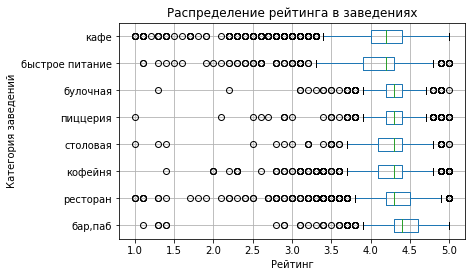

In [57]:
# Получаем отсортированный список категорий
sorted_categories = sorted_category_rating_stats['category'].tolist()

# Создаем новую колонку 'category' в newdf, которая будет отсортирована
newdf['category'] = pd.Categorical(newdf['category'], categories=sorted_categories, ordered=True)

# Строим диаграмму размаха значений в столбце 'rating' с группировкой по 'category'
plt.figure(figsize=(10, 6))
newdf.boxplot(column='rating', by='category', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение рейтинга в заведениях')
plt.suptitle('')  # Удаляем заголовок по умолчанию
plt.xlabel('Рейтинг')
plt.ylabel('Категория заведений')

# Выводим график
plt.show()

В разбивке по категориям размах рейтинга следующий:

Рестораны 3.8-4.9

Кофейня 3.7-4.8

Кафе 3.4-5.0

Бар, паб 3.9-5.0

Строим ящики с усами без выбросов.

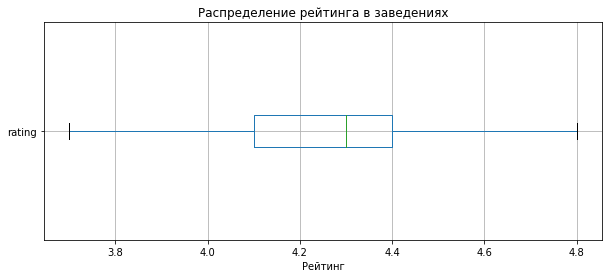

In [58]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце balance
newdf.boxplot(column='rating', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение рейтинга в заведениях')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

<Figure size 720x432 with 0 Axes>

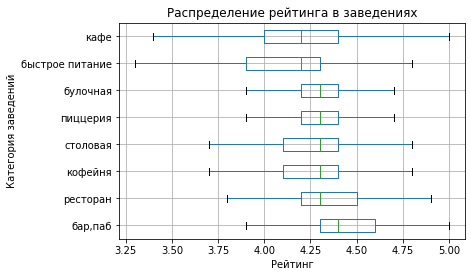

In [59]:
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха значений в столбце 'rating' с группировкой по 'category'
newdf.boxplot(column='rating', by='category', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение рейтинга в заведениях')
plt.suptitle('')  # Удаляем заголовок по умолчанию
plt.xlabel('Рейтинг')
plt.ylabel('Категория заведений')

# Выводим график
plt.show()

---
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Задания ниже отсутствуют
</div>

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

/tmp/ipykernel_251/4290027922.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf_for_correlation[col] = newdf_for_correlation[col].astype('category')


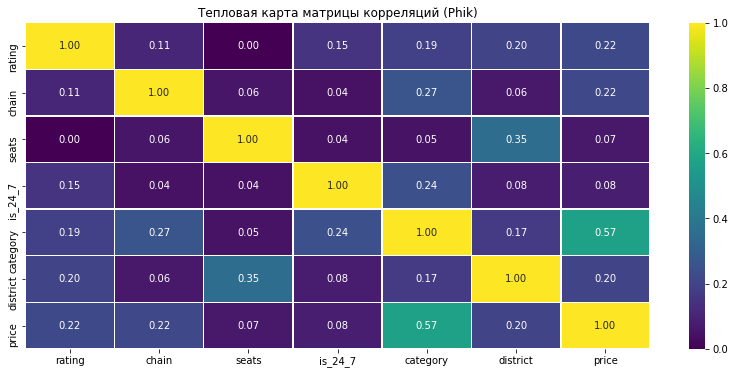

In [60]:
# Исходные данные
columns_correlation = ['rating', 'chain', 'seats', 'is_24_7']
columns_category = ['category', 'district', 'price']

# Объединяем все столбцы
all_columns = columns_correlation + columns_category

# Выбираем столбцы из DataFrame
newdf_for_correlation = newdf[all_columns]

# Делаем цикл, что categorical столбцы являются категориальными
for col in columns_category:
    newdf_for_correlation[col] = newdf_for_correlation[col].astype('category')

interval_cols = ['seats', 'rating']

# Считаем матрицу корреляции
phik_corr = newdf_for_correlation.phik_matrix(interval_cols=interval_cols)

# Задаём размер графика
plt.figure(figsize=(14, 6))

# Создаём визуализацию
sns.heatmap(data=phik_corr, annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций (Phik)')
plt.show()


Как видно, взаимосвязь между рейтингом и другими полями достаточно низкая. Самая высокая связь у рейтинга с ценой (0.22), но это также низкое значение. 

Самая высокая связь у категории с ценой (0.57). Очевидно, что в ресторане цена выше, чем в булочной и пункте быстрого питания.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [61]:
# Группируем данные по названиям заведений и категориям, 
# считаем количество заведений и средний рейтинг
top15 = (
    newdf[newdf['chain'] == 1]  # Фильтруем по цепочкам заведений
    .groupby(['name', 'category'])  # Группируем по имени и категории
    .agg(
        count=('name', 'count'),          # Подсчёт заведений
        mean_rating=('rating', 'mean')    # Средний рейтинг
    )
)

# Сортируем данные по количеству заведений и выбираем топ-15
top_name = top15.sort_values(by='count', ascending=False).head(15)

# Выводим результаты
display(top_name)

,,count,mean_rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


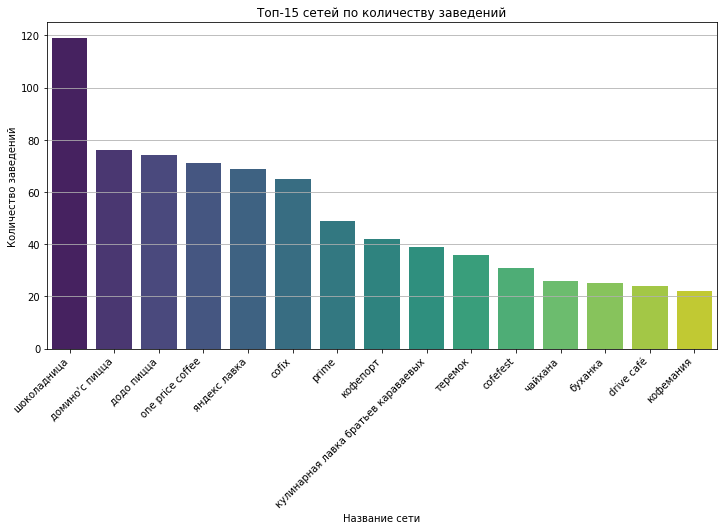

In [62]:
# Сброс индексов для удобства работы с данными в графике
top_name_reset = top_name.reset_index()

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика
sns.barplot(data=top_name_reset, x='name', y='count', palette='viridis')  # Столбчатая диаграмма

# Настройка заголовка и меток осей
plt.title('Топ-15 сетей по количеству заведений')  # Заголовок графика
plt.xlabel('Название сети')  # Метка для оси X
plt.ylabel('Количество заведений')  # Метка для оси Y

# Поворот названий по оси X для лучшей читабельности
plt.xticks(rotation=45, ha='right')

# Добавление сетки по оси Y
plt.grid(axis='y')

# Отображение графика
plt.show()

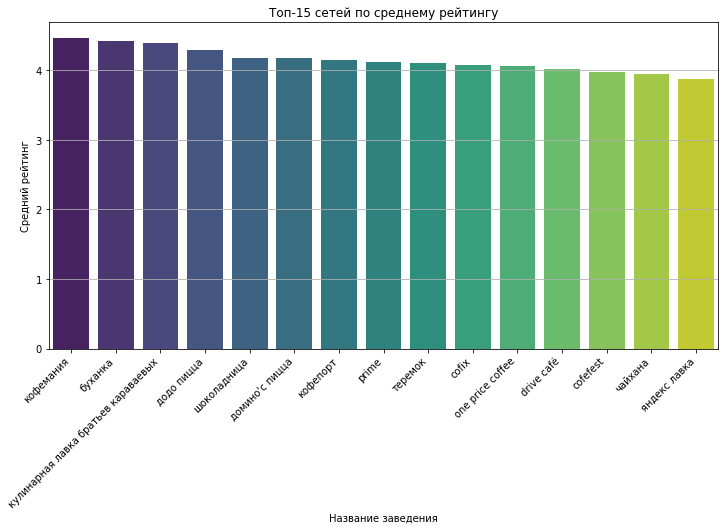

In [63]:
# Сброс индексов для удобства работы с данными в графике
top_name_reset = top_name.reset_index()

# Сортировка по убыванию среднего рейтинга
top_name_sorted = top_name_reset.sort_values(by='mean_rating', ascending=False)

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика
sns.barplot(data=top_name_sorted, x='name', y='mean_rating', palette='viridis')  # Столбчатая диаграмма

# Настройка заголовка и меток осей
plt.title('Топ-15 сетей по среднему рейтингу')  # Заголовок графика
plt.xlabel('Название заведения')  # Метка для оси X
plt.ylabel('Средний рейтинг')  # Метка для оси Y

# Поворот названий по оси X для лучшей читабельности
plt.xticks(rotation=45, ha='right')

# Добавление сетки по оси Y
plt.grid(axis='y')

# Отображение графика
plt.show()

Самые популярные сети по количеству заведений: Шоколадница - 120 шт, Домино`с пицца - 76 шт, Додо пицца - 74 шт.

Самые высокие средние оценки: Кофемания - 4.46, Буханка - 4.42, Кулинарная лавка братьев Караваевых - 4.39."

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [64]:
# Изучение среднего чека middle_avg_bill в зависимости от района Москвы district
middle_avg_bill_in_district = newdf.groupby('district')['middle_avg_bill'].mean()

# Сортировка по убыванию среднего чека
middle_avg_bill_in_district_sorted = middle_avg_bill_in_district.sort_values(ascending=False)

# Переименование столбцов для ясности
middle_avg_bill_in_district_sorted = middle_avg_bill_in_district_sorted.reset_index()  # Сброс индексов после сортировки
middle_avg_bill_in_district_sorted.columns = ['district', 'middle_avg_bill']  # Переименование колонок

# Вывод среднего чека по районам
display(middle_avg_bill_in_district_sorted)

,district,middle_avg_bill
0,Центральный административный округ,1191.057547
1,Западный административный округ,1053.225490
2,Северный административный округ,927.959627
3,Южный административный округ,834.398089
4,Северо-Западный административный округ,822.222930
5,Восточный административный округ,820.626923
6,Юго-Западный административный округ,792.561702
7,Северо-Восточный административный округ,716.611296
8,Юго-Восточный административный округ,654.097938


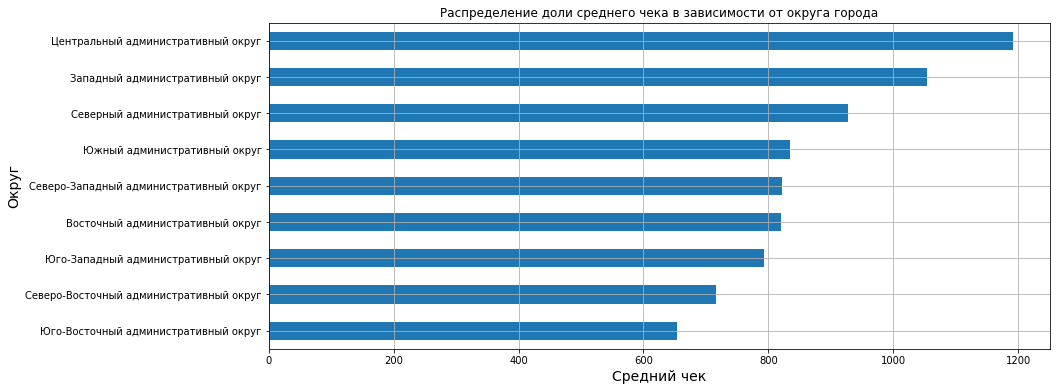

In [65]:
# Строим график столбчатой диаграммы
# Группируем данные по округам и рассчитываем средний чек
grouped = newdf.groupby('district')['middle_avg_bill'].mean()

# Сортируем значения среднего чека
grouped_sorted = grouped.sort_values()

# Строим горизонтальную столбчатую диаграмму
grouped_sorted.plot(kind='barh',
                    title='Распределение доли среднего чека в зависимости от округа города',
                    legend=False,
                    rot=0,
                    figsize=(14, 6))

plt.ylabel('Округ', fontsize=14)
plt.xlabel('Средний чек', fontsize=14)

# Добавляем сетку к графику для лучшей читабельности
plt.grid()

# Выводим график
plt.show()

Самый высокий средний чек в Центральном округе (1191 руб), далее Западный округ (1053 руб) и Северный округ (928 руб).

Самые "бюджетные" округа - Юго-Восточный (654 руб) и Северо-Восточный (717 руб).

In [66]:
# Группируем цены в Центральном округе по категориям
price_tsao = newdf[newdf['district'] == 'Центральный административный округ'].groupby('category').agg(
    middle_avg_bill=('middle_avg_bill', 'mean')  # вычисляем средний чек по категориям
)

# Выводим результаты
display(price_tsao)

,middle_avg_bill
category,
"бар,паб",1479.739884
ресторан,1561.059113
кофейня,794.764706
столовая,319.886364
пиццерия,1104.839506
булочная,1237.916667
быстрое питание,532.081633
кафе,765.176190


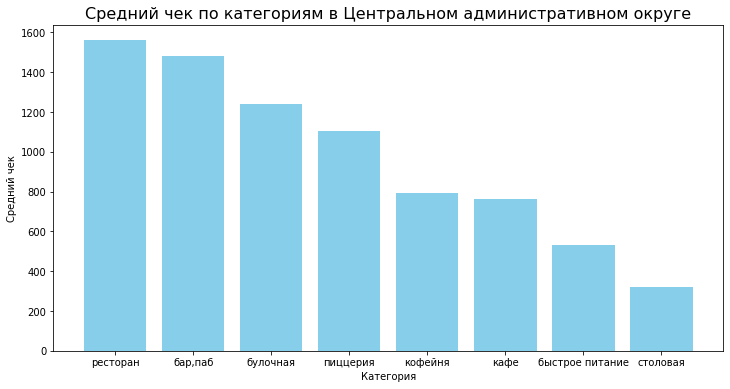

In [67]:
# Определяем средний чек по категориям в Центральном административном округе
price_tsao = newdf[newdf['district'] == 'Центральный административный округ'].groupby('category').agg(
    middle_avg_bill=('middle_avg_bill', 'mean')  # Вычисляем средний чек по каждой категории
)

# Сбрасываем индексы для удобства
price_tsao = price_tsao.reset_index()

# Сортируем результаты по среднему чеку в порядке убывания
price_tsao = price_tsao.sort_values(by='middle_avg_bill', ascending=False)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика
plt.bar(price_tsao['category'], price_tsao['middle_avg_bill'], color='skyblue')  # Столбцы графика

# Настраиваем заголовок и метки осей
plt.title('Средний чек по категориям в Центральном административном округе', fontsize=16)
plt.xlabel('Категория')
plt.ylabel('Средний чек')

# Показываем график
plt.show()

По категориям в Центральном округе самые дорогие по среднему чеку - рестораны (1591 руб), бар-паб (1480 руб) и булочные (1238 руб).

In [68]:
# Изучаем статистические показатели столбца middle_avg_bill по округам
category_district_middle_avg_bill = newdf.groupby('district')['middle_avg_bill'].describe()

# Сортируем результаты по медиане
sorted_by_median = category_district_middle_avg_bill.sort_values(by='50%', ascending=False)

# Отображаем отсортированные результаты
display(sorted_by_median)

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Западный административный округ,306.0,1053.225490,779.008536,50.0,427.50,1000.0,1500.0,5250.0
Центральный административный округ,1060.0,1191.057547,920.014707,0.0,500.00,1000.0,1500.0,7250.0
Северо-Западный административный округ,157.0,822.222930,595.055218,120.0,340.00,700.0,1100.0,2900.0
Северный административный округ,322.0,927.959627,912.609221,130.0,350.00,650.0,1250.0,11000.0
Юго-Западный административный округ,235.0,792.561702,559.173122,100.0,350.00,600.0,1100.0,2750.0
Восточный административный округ,260.0,820.626923,850.903310,50.0,338.00,575.0,1100.0,10000.0
Северо-Восточный административный округ,301.0,716.611296,591.232153,50.0,325.00,500.0,950.0,4500.0
Южный административный округ,314.0,834.398089,2008.640596,100.0,350.00,500.0,1037.5,35000.0
Юго-Восточный административный округ,194.0,654.097938,566.825663,30.0,281.25,450.0,887.5,3750.0


/tmp/ipykernel_251/3323862395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['district'] = pd.Categorical(newdf['district'], categories=sorted_districts, ordered=True)


<Figure size 1008x432 with 0 Axes>

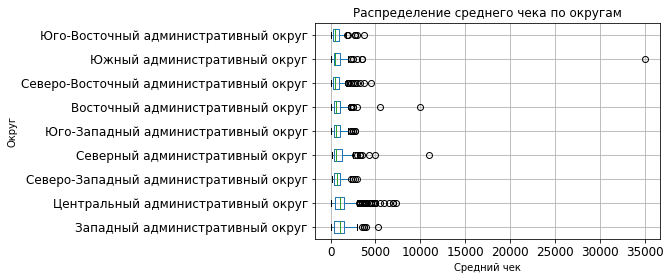

In [69]:
# Вычисляем медиану по округам
median_values = newdf.groupby('district')['middle_avg_bill'].median()

# Сортируем округа по медиане
sorted_districts = median_values.sort_values(ascending=False).index

# Создаем новый DataFrame, в котором округа отсортированы по медиане
newdf['district'] = pd.Categorical(newdf['district'], categories=sorted_districts, ordered=True)

plt.figure(figsize=(14, 6))

# Строим диаграмму размаха значений в столбце 'middle_avg_bill' с группировкой по 'district'
newdf.boxplot(column='middle_avg_bill', by='district', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение среднего чека по округам')
plt.suptitle('')  # Удаляем заголовок по умолчанию
plt.xlabel('Средний чек')
plt.ylabel('Округ')

# Увеличиваем размер шрифта меток на оси Y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Выводим график
plt.show()

/tmp/ipykernel_251/3192563840.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['district'] = pd.Categorical(newdf['district'], categories=sorted_districts, ordered=True)


<Figure size 1008x432 with 0 Axes>

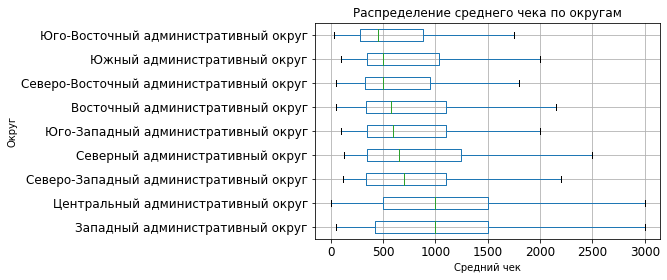

In [70]:
# Вычисляем медиану по округам
median_values = newdf.groupby('district')['middle_avg_bill'].median()

# Сортируем округа по медиане
sorted_districts = median_values.sort_values(ascending=False).index

# Создаем новый DataFrame, в котором округа отсортированы по медиане
newdf['district'] = pd.Categorical(newdf['district'], categories=sorted_districts, ordered=True)

plt.figure(figsize=(14, 6))

# Строим диаграмму размаха значений в столбце 'middle_avg_bill' с группировкой по 'district'
newdf.boxplot(column='middle_avg_bill', by='district', vert=False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение среднего чека по округам')
plt.suptitle('')  # Удаляем заголовок по умолчанию
plt.xlabel('Средний чек')
plt.ylabel('Округ')

# Увеличиваем размер шрифта меток на оси Y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Выводим график
plt.show()

По диаграмме размаха - диапазон цен в Центральном и Западном округах самый высокий - до 75% значений находится в диапазоне до 1500 рублей, при этом данные за пределами правой границы Q3 + ((Q3-Q1) * 1.5) = 1500 + ((1500-500) * 1.5) = 3000 руб, значения правее являются выбросами.

Самый бюджетный округ - Юго-Восточный, до 75% значений находится до суммы 887.50 руб. Это более чем на 40% дешевле Центрального и Западного округов.

---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


In [71]:
# Изучение средней стоимости кофе middle_coffee_cup в зависимости от района Москвы district
middle_avg_bill_in_district = newdf.groupby('district')['middle_coffee_cup'].mean()

# Сортировка по убыванию средней стоимости кофе
middle_coffee_cup_in_district_sorted = middle_avg_bill_in_district.sort_values(ascending=False)

# Вывод среднего чека по районам
display(middle_coffee_cup_in_district_sorted)

district
Западный административный округ            189.640000
Центральный административный округ         188.210843
Юго-Западный административный округ        183.485714
Восточный административный округ           174.023810
Северо-Восточный административный округ    165.333333
Северный административный округ            165.090909
Северо-Западный административный округ     160.458333
Южный административный округ               157.826087
Юго-Восточный административный округ       150.771429
Name: middle_coffee_cup, dtype: float64

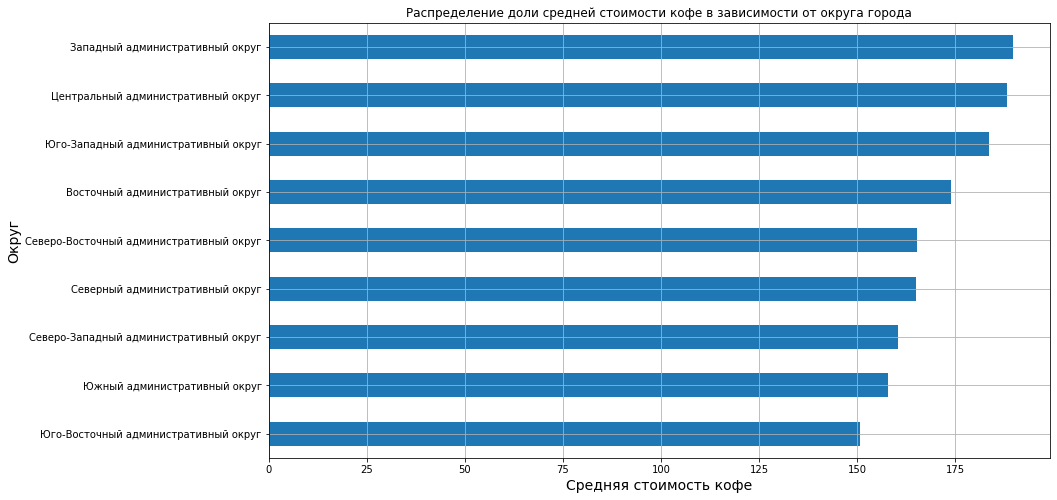

In [72]:
# Строим график столбчатой диаграммы
grouped = newdf.groupby('district')['middle_coffee_cup'].mean()
grouped_sorted = grouped.sort_values()

plt.figure(figsize=(14, 8))  # Увеличение размера графика

# Построение графика
grouped_sorted.plot(kind='barh',
                    title='Распределение доли средней стоимости кофе в зависимости от округа города',
                    legend=False,
                    rot=0)

# Установка меток осей
plt.ylabel('Округ', fontsize=14)
plt.xlabel('Средняя стоимость кофе', fontsize=14)

plt.grid()

# Выводим график
plt.show()

По средней стоимости чашки кофе лидируют Западный, Центральный и Юго-Западный административный округа (183-189 руб), самая "дешевая" чашка кофе - в Юго-Восточном округе (151 руб)

In [73]:
# Изучение средней стоимости кофе middle_coffee_cup в зависимости от категории заведения category
middle_avg_bill_in_category = newdf.groupby('category')['middle_coffee_cup'].mean()

# Сортировка по убыванию средней стоимости кофе
middle_coffee_cup_in_category_sorted = middle_avg_bill_in_category.sort_values(ascending=False)

# Вывод среднего чека по категориям
display(middle_coffee_cup_in_category_sorted)

category
бар,паб            208.333333
кофейня            175.055662
пиццерия           153.333333
быстрое питание    140.000000
кафе               105.500000
ресторан                  NaN
столовая                  NaN
булочная                  NaN
Name: middle_coffee_cup, dtype: float64

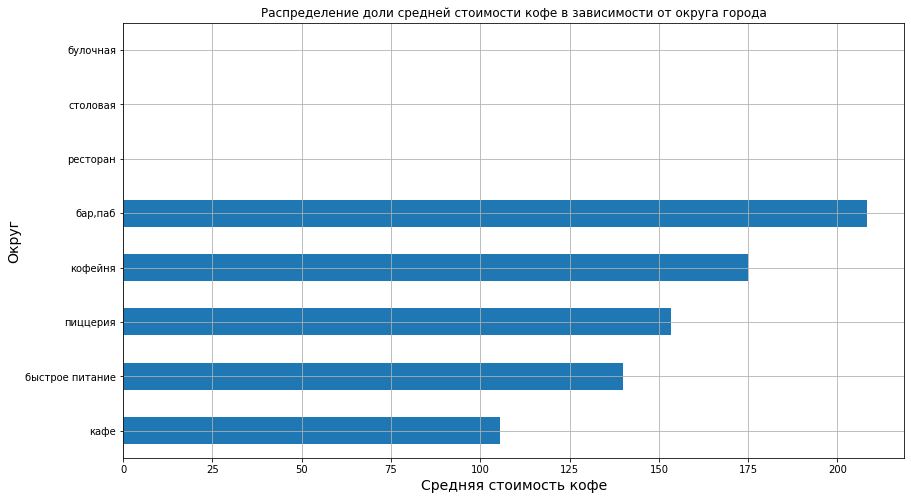

In [74]:
# Строим график столбчатой диаграммы
grouped = newdf.groupby('category')['middle_coffee_cup'].mean()
grouped_sorted = grouped.sort_values()

plt.figure(figsize=(14, 8))  # Увеличение размера графика

# Построение графика
grouped_sorted.plot(kind='barh',
                    title='Распределение доли средней стоимости кофе в зависимости от округа города',
                    legend=False,
                    rot=0)

# Установка меток осей
plt.ylabel('Округ', fontsize=14)
plt.xlabel('Средняя стоимость кофе', fontsize=14)

plt.grid()

# Выводим график
plt.show()

Средняя стоимсть чашки кофе (в первой части работы) была заполнена в 13% первоначальных значений. Рестораны, булочные и столовые не указывали стоимость. Диапазон в остальных заведениях 105-209 руб, самое дорогое в барах и пабах, самое дешевое - в кафе.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b> 
<br>Отличная работа!
</div>

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Были изучены категории заведений, самое большое количество заведений - это кафе (2375 шт), ресторан (2040 шт) и кофейня (1413 шт). Остальных категорий существенно меньше.

Изучили данные по 9 административным округам Москвы. По количеству объектов питания самый большой округ - Центральный. Больше всего в центре представлены рестораны, кафе и кофейни.

Несетевых заведений почти 62%, сетевых - 38%. Среди кафе и ресторанов несетевых заведений также больше, в 1.7-2 раза.

По количеству мест среднее значение составляет 108, при этом в ресторанах в среднем 121 место, в кофейне 111, в кафе 97.

Средний рейтинг по заведениям города составляет 4.2-4.4 из 5. При этом основная масса оценок в ресторанах, кафе, пабах и барах 3.7-5.0. В целом взаимосвязь у рейтинга с другими показателями низкая, самое высокое значение в связке рейтинг-цена.

Среди сетевых заведений самые популярные: Шоколадница, Доминос пицца и Додо пицца. Самый высокий средний рейтинг: Кофемания, Буханка и Кулинарная лавка братьев Караваевых.

Самый высокий средний чек в Центральном (1191 руб) и Западном (1053 руб), самый низкий - в Юго-Восточном (654 руб). Самые дорогие категории в центральном округе - рестораны, бары-пабы и булочные.

По средней стоимости чашки кофе лидируют Центральный, Западный и Юго-Западный округа (183-189 руб). По мере удаленности от центра средний чек снижается. Относительную конкуренцию центру составляет Западный округ.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

Были исследованы организации общественного питания в Москве, всего 8406 штук. На основе двух таблиц сделали предобработку данных, выявили долю пропусков в каждом столбце. Пропуски было решено оставить, так как их доля составляла в столбцах для дальнейших расчетов 40-60%. Удалены 8 неявных дубликатов, после чего был проведен исследовательский анализ по различным показателям, с таблицами и графиками.

Изучены категории объектов общественного питания, среди которых преобладают рестораны, кафе и кофейни. При исследовании были проанализированы данные как в целом по городу, так и по 9 административным округам в частности.

В Центральном округе сосредоточено больше всего заведений, в остальных округах наблюдается баланс, при этом в них меньше в 2.5-3 раза данных заведений. Это связано с тем, что центр является притяжением как для работающих людей, так и для отдыхающих в выходные. В центре находится больше всего достопримечательностей, и самая активная жизнь также проходит в его пределах.

По размеру среднего чека также лидируют Центральный и Западный округа. Если в центре происходит самая активная жизнь, а жилье дорогое, то Западный округ считается престижным с точки зрения проживания, там больше состоятельных клиентов.

Юго-Восточный округ оказался самым бюджетным, здесь много спальных районов, которые считаются наименее престижными по Москве, из-за чего средний чек по заведениям также ниже. По мере удаления от центра снижается как количество заведений, так и средний чек.

Среди сетевых заведений самое большое количество наблюдается в "Шоколаднице", "Доминос пицца" и "Додо Пицца".

По рейтингу заведения в Москве отличаются достаточно хорошим сервисом, средняя оценка составляет 4.2-4.4 из 5.

По количеству мест среднее заведение имеет порядка 108 мест, в целом диапазон среди ресторанов, баров и кафе составляет 90-125 мест.

Для потенциального инвестора есть много вариантов по открытию заведения. Однако многое зависит от первоначального бюджета, типа заведения, расположения объекта и потенциальной площади помещения.

Если инвестор желает открыть престижное заведение с быстрой рентабельностью, то можно порекомендовать открыть ресторан, паб или бар в центре города. Однако это потребует значительных вложений и отличного сервиса. Конкуренция среди заведений очень высокая, но будет регулярный поток клиентов как в будни, так и в выходные дни.

Если цель — привлечь наиболее состоятельных клиентов, то нужно ориентироваться на центр, а также на престижные районы Запад и Юго-Запад. Если есть желание открыть заведение в бюджетном сегменте, то можно рассмотреть Юго-Восток.